# IMAGE COMPRESSION WITH K-MEANS ALGORITHM (FROM SCRATCH)

## Import libraries

In [1]:
import numpy as np
import PIL
import matplotlib.pyplot as plt

## Implementations

Global variable

In [2]:
maxIter = None
clusterType = ['random', 'in_pixels']
stopDistance = 0.000001
fileOutType = ['.png', '.pdf']

Read input image function

In [3]:
def read_image(name):
    if type(name) != str:
        raise ValueError('This is not a name of path to picture!')
        return
    
    return PIL.Image.open(name)

Convert raw data (3D tensor) into 2D tensor for more convenient operations in the futher

In [4]:
def initialize_color(image):
    colorPoint = np.array(image)
    m, n, p = colorPoint.shape
    colorPoint = np.reshape(colorPoint, (m * n, p))
    
    return colorPoint

Initialize initial centroid by options

In [5]:
def initialize_centroids(colorPoint, k_clusters, clusterT):
    if clusterT not in clusterType:
        raise ValueError('Unknow way to choose cluster')
        
    row, col = colorPoint.shape
    if clusterT == clusterType[0]:
        return np.random.randint(0, 255, (k_clusters, col), dtype = np.intc)
    else:
        return colorPoint[np.random.choice(row, k_clusters, replace=False)]

Using Euclidean distance for measuring distance between nodes in K-means algorithm.

In [6]:
def EuclideanDistance(x, y):
    res = np.sqrt((int(y[0]) - int(x[0])) ** 2 + (int(y[1]) - int(x[1])) ** 2)
    return res

Following function used for update label of nodes in each iterations in K-means

In [7]:
def UpdateLabel(img_1d, centroids):
    labels = [0 for _ in range(img_1d.shape[0])]
    
    for i in range(img_1d.shape[0]):
        minDist = 1000

        for j in range(centroids.shape[0]):
            dist = EuclideanDistance(centroids[j], img_1d[i])
            if(dist < minDist):
                minDist = dist
                labels[i] = j
    
    return np.array(labels)

Below functions used for updating centroid after labeling for nodes.

In [8]:
def UpdateCentroids(img_1d, centroids, labels):
    for i in range(centroids.shape[0]):
        centroidK = img_1d[labels == i, :]
        if(centroidK.shape[0] != 0 and centroidK.shape[1] != 0):
            mean = np.mean(centroidK, axis = 0)
            centroids[i, :] = mean[:]
    
    return centroids

Finally, It's K-means

In [9]:
def kmeans(img_1d, k_clusters, max_iter, init_centroids='random'):
    row, col = img_1d.shape

    #Initialize label array
    labels = None
    
    #Initialize centroid
    centroids = initialize_centroids(img_1d, k_clusters, init_centroids)
    
    for _ in range(max_iter):
        labels = UpdateLabel(img_1d, centroids)
        
        oldCentroids = centroids[:]
        centroids = UpdateCentroids(img_1d, centroids, labels)
        
        # Stop condition: when coverged, it mean that when centroid not change or change very little
        if (np.abs(centroids - oldCentroids)).all() < stopDistance:
            break
            
    return centroids, labels

Export successfully!


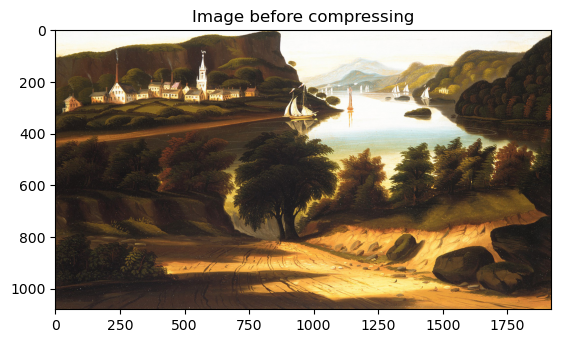

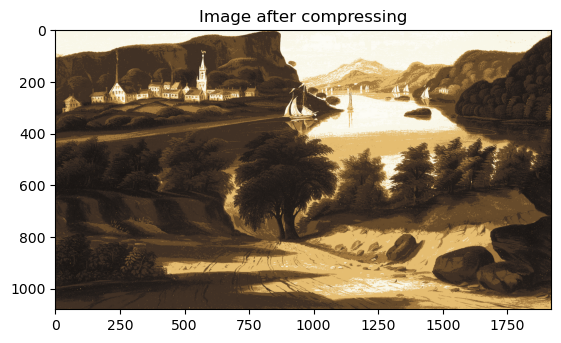

In [10]:
if __name__ ==  "__main__":
    # First step: load image
    #input parameter
    clusters = int(input('How many colors do you want in your image? '))
    iterN = int(input('How max loop (use for more exact when compress) do you want? '))
    clusterT = int(input('What way do you want to choose compress color? (0: random - 1: in_pixels): '))
    
    #output parameter
    file = str(input('Enter path to image file: '))
    nameFileOut = str(input('What name of file out? '))
    fileOutT = int(input("What file out (0: .png - 1: .pdf): "))
    ima = read_image(file)
    
    plt.figure()
    plt.title('Image before compressing')
    plt.imshow(ima)
    
    # Second step: convert image object into color array
    colorPoint = initialize_color(ima)
    
    # Third step: get label and centroid after apply k-means algorithm
    centroids, labels = kmeans(colorPoint, clusters, iterN, clusterType[clusterT])
    
    # Fourth step: create new color array from label and centroid above
    newColorPoint = centroids[labels.astype(int), :]
    
    # Fifth step: convert array 
    m, n, p = np.array(ima).shape
    newColorPoint = np.reshape(newColorPoint, (m, n, p))
    plt.figure()
    plt.title('Image after compressing')
    plt.imshow(newColorPoint)
    
    # Sixth step: Output image file
    outImg = PIL.Image.fromarray(newColorPoint.astype('uint8'), 'RGB')

    try:
        outImg.save(nameFileOut + fileOutType[fileOutT])
    except:
        print('File out type is invalid!\nCan not export compressed image file!')
    else:
        print('Export successfully!')